# Stacking with Standalone and Ensemble Algorithms

In this activity, we'll use the Boston House Prices: Advanced Regression Techniques Database (available here or at Packt GitHub repository).

This dataset is aimed toward solving a regression problem (that is, the target variable takes on a range of continuous values). In this activity, we will use decision trees, k-nearest neighbors, random forest, and gradient boosting algorithms to train individual regressors on the data. Then, we will build a stacked linear regression model that uses all these algorithms and compare the performance of each. We will use the ***mean absolute error (MAE)*** as the evaluation metric for this activity.
> **Note**: The MAE function, **mean_absolute_error()**, can be used in a similar way to the **accuracy_score()** measure used previously.

### 1. Import the relevant libraries.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

### 2. Read the data.

In [37]:
data = pd.read_csv('../Datasets/boston_house_prices.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 3. Preprocess the dataset

to remove null values and one-hot encoded categorical variables to prepare the data for modeling.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


--> nincs null oszlop, nincs kategorikus érték

### 4. Divide the dataset into train and validation DataFrames.

In [39]:
train, test = train_test_split(data, test_size=0.2, random_state=11)

x_train = train.iloc[:, :-1]
y_train = train['PRICE']
x_test = test.iloc[:, :-1]
y_test = test['PRICE']

### 5. Initialize dictionaries in which to store the train and validation MAE values.

In [40]:
train_mae = {}
test_mae = {}

### 6. Train a DecisionTreeRegressor model (dt) and save the scores.

In [41]:
dt_params = {
    'criterion': 'mae',
    'min_samples_leaf': 15,
    'random_state': 11
}

dt_model = DecisionTreeRegressor(**dt_params)
dt_model.fit(x_train, y_train)
train_mae['dt'] = mean_absolute_error(y_train, dt_model.predict(x_train))
test_mae['dt'] = mean_absolute_error(y_test, dt_model.predict(x_test))
print(train_mae)
print(test_mae)

{'dt': 2.384405940594059}
{'dt': 3.282352941176471}


### 7. Train a KNeighborsRegressor model (knn) and save the scores:

In [42]:
knn_params = {
    'n_neighbors': 5
}

knn_model = KNeighborsRegressor(**knn_params)
knn_model.fit(x_train, y_train)
train_mae['knn'] = mean_absolute_error(y_train, knn_model.predict(x_train))
test_mae['knn'] = mean_absolute_error(y_test, knn_model.predict(x_test))
print(train_mae)
print(test_mae)

{'dt': 2.384405940594059, 'knn': 3.4555445544554453}
{'dt': 3.282352941176471, 'knn': 3.978039215686274}


### 8. Train a RandomForestRegressor model (rf) with the following hyperparameters and save the scores:

In [43]:
rf_params = {
    'n_estimators': 20,
    'criterion': 'mae',
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'random_state': 11,
    'n_jobs': -1
}

rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(x_train, y_train)
train_mae['rf'] = mean_absolute_error(y_train, rf_model.predict(x_train))
test_mae['rf'] = mean_absolute_error(y_test, rf_model.predict(x_test))
print(train_mae)
print(test_mae)

{'dt': 2.384405940594059, 'knn': 3.4555445544554453, 'rf': 2.3161200495049505}
{'dt': 3.282352941176471, 'knn': 3.978039215686274, 'rf': 3.029828431372549}


### 9. Train a GradientBoostingRegressor model (gbr) and save the scores:

In [44]:
gbr_params = {
    'n_estimators': 20,
    'criterion': 'mae',
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'random_state': 11
}

gbr_model = GradientBoostingRegressor(**gbr_params)
gbr_model.fit(x_train, y_train)
train_mae['gbr'] = mean_absolute_error(y_train, gbr_model.predict(x_train))
test_mae['gbr'] = mean_absolute_error(y_test, gbr_model.predict(x_test))
print(train_mae)
print(test_mae)

{'dt': 2.384405940594059, 'knn': 3.4555445544554453, 'rf': 2.3161200495049505, 'gbr': 2.452970150677511}
{'dt': 3.282352941176471, 'knn': 3.978039215686274, 'rf': 3.029828431372549, 'gbr': 3.0544773726460575}


### 10. Prepare the training and validation datasets, with the four meta estimators having the same hyperparameters that were used in the previous steps.

In [45]:
# datasets with placeholders for meta fetures
x_train_meta = np.zeros((x_train.shape[0], x_train.shape[1] + 4))
x_train_meta[:, :-4] = x_train
x_train_meta[:, -4:] = -1

x_test_meta = np.zeros((x_test.shape[0], x_test.shape[1] + 4))
x_test_meta[:, :-4] = x_test
x_test_meta[:, -4:] = -1

In [46]:
# Train dataset --> K-fold cross validator
kf = KFold(random_state=11)

for train_ndx, test_ndx in kf.split(x_train):
    kf_x_train = x_train.iloc[train_ndx]
    kf_x_test = x_train.iloc[test_ndx]
    kf_y_train = y_train.iloc[train_ndx]
    kf_y_test = y_train.iloc[test_ndx]

    # dt
    dt_model = DecisionTreeRegressor(**dt_params)
    dt_model.fit(kf_x_train, kf_y_train)
    dt_pred = dt_model.predict(kf_x_test)
    x_train_meta[test_ndx, -4] = dt_pred

    # knn
    knn_model = knn_model = KNeighborsRegressor(**knn_params)
    knn_model.fit(kf_x_train, kf_y_train)
    knn_pred = knn_model.predict(kf_x_test)
    x_train_meta[test_ndx, -3] = knn_pred
    
    # rf
    rf_model = RandomForestRegressor(**rf_params)
    rf_model.fit(kf_x_train, kf_y_train)
    rf_pred = rf_model.predict(kf_x_test)
    x_train_meta[test_ndx, -2] = rf_pred

    # gbr
    gbr_model = GradientBoostingRegressor(**gbr_params)
    gbr_model.fit(kf_x_train, kf_y_train)
    gbr_pred = gbr_model.predict(kf_x_test)
    x_train_meta[test_ndx, -1] = gbr_pred

print(x_train_meta)

[[1.25790000e-01 4.50000000e+01 3.44000000e+00 ... 2.83200000e+01
  2.87650000e+01 2.62822490e+01]
 [4.75470000e-01 0.00000000e+00 9.90000000e+00 ... 2.00800000e+01
  2.10575000e+01 2.13476823e+01]
 [8.52040000e-01 0.00000000e+00 8.14000000e+00 ... 1.83600000e+01
  1.81950000e+01 1.91550768e+01]
 ...
 [4.11300000e-02 2.50000000e+01 4.86000000e+00 ... 2.35400000e+01
  2.77375000e+01 2.48268535e+01]
 [6.91100000e-02 4.50000000e+01 3.44000000e+00 ... 2.55200000e+01
  2.90650000e+01 2.61716501e+01]
 [1.44383000e+01 0.00000000e+00 1.81000000e+01 ... 1.61800000e+01
  1.65925000e+01 1.49455150e+01]]


In [47]:
# Test dataset

# dt
dt_model = DecisionTreeRegressor(**dt_params)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
x_test_meta[:, -4] = dt_pred

# knn
knn_model = knn_model = KNeighborsRegressor(**knn_params)
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)
x_test_meta[:, -3] = knn_pred

# rf
rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
x_test_meta[:, -2] = rf_pred

# gbr
gbr_model = GradientBoostingRegressor(**gbr_params)
gbr_model.fit(x_train, y_train)
gbr_pred = gbr_model.predict(x_test)
x_test_meta[:, -1] = gbr_pred

print(x_test_meta)

[[ 0.04981    21.          5.64       ... 27.08       22.38
  22.50736016]
 [ 0.20746     0.         27.74       ... 17.46       15.7075
  16.36020944]
 [ 0.11329    30.          4.93       ... 21.84       26.8725
  27.42425414]
 ...
 [ 0.19657    22.          5.86       ... 19.68       23.12
  21.86418259]
 [ 3.8497      0.         18.1        ... 17.16       19.065
  19.57955621]
 [ 0.17134     0.         10.01       ... 17.96       19.24
  18.7009189 ]]


### 11. Train a LinearRegression model (lr) as the stacked model.

In [49]:
lr_model = LinearRegression()
lr_model.fit(x_train_meta, y_train)
train_mae['lr'] = mean_absolute_error(y_train, lr_model.predict(x_train_meta))
test_mae['lr'] = mean_absolute_error(y_test, lr_model.predict(x_test_meta))
print(train_mae)
print(test_mae)

{'dt': 2.384405940594059, 'knn': 3.4555445544554453, 'rf': 2.3161200495049505, 'gbr': 2.452970150677511, 'lr': 2.2480863500412833}
{'dt': 3.282352941176471, 'knn': 3.978039215686274, 'rf': 3.029828431372549, 'gbr': 3.0544773726460575, 'lr': 2.852430364538781}


### 12. Visualize the train and validation errors for each individual model and the stacked model.

In [59]:
MAE = pd.concat([pd.Series(train_mae, name='train'), pd.Series(test_mae, name='test')], axis=1)
MAE

,train,test
dt,2.384406,3.282353
knn,3.455545,3.978039
rf,2.316120,3.029828
gbr,2.452970,3.054477
lr,2.248086,2.852430


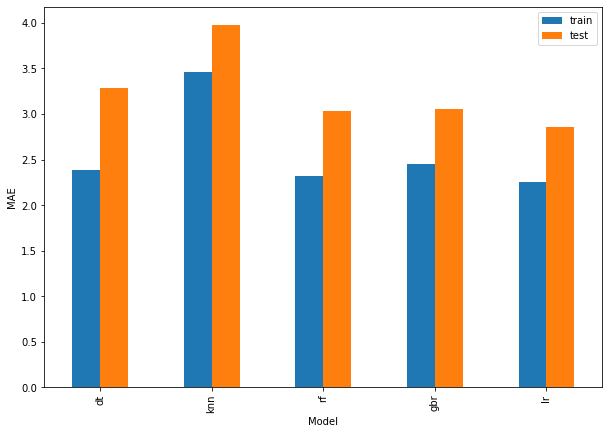

In [64]:
MAE.plot(kind='bar', figsize=(10,7))
plt.ylabel('MAE')
plt.xlabel('Model')
plt.show()